# CONNECTING TO IB API AND GETTING HISTORICAL DATA


In [1]:
%pip install ib_insync

Note: you may need to restart the kernel to use updated packages.


In [22]:
# importing necessary libraries
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)

#To get a list of all exchanges that support market depth data and display the first 8:

l = ib.reqMktDepthExchanges()
l[:8]

[DepthMktDataDescription(exchange='DTB', secType='OPT', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='COMEX', secType='FOP', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='LSEETF', secType='STK', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='SGX', secType='FUT', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='NASDAQ', secType='WAR', listingExch='', serviceDataType='Deep2', aggGroup=2147483647),
 DepthMktDataDescription(exchange='IDEALPRO', secType='CASH', listingExch='', serviceDataType='Deep', aggGroup=4),
 DepthMktDataDescription(exchange='ARCA', secType='STK', listingExch='', serviceDataType='Deep', aggGroup=2147483647),
 DepthMktDataDescription(exchange='AEB', secType='IOPT', listingExch='', serviceDataType='Deep', aggGroup=2147483647)]

Get Historical data from Interactive brokers

In [53]:
contract = Stock('TSLA', 'SMART', 'USD')

ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

datetime.datetime(2010, 6, 29, 8, 0)

In [57]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 Y',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1)

In [58]:
bars[0]

BarData(date=datetime.datetime(2023, 3, 16, 9, 30, tzinfo=zoneinfo.ZoneInfo(key='US/Eastern')), open=180.27, high=182.48, low=178.84, close=182.2, volume=15069416.0, average=180.377, barCount=51590)

Convert the bars into rows and columns

In [59]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,average,barCount
0,2023-03-16 09:30:00-04:00,180.27,182.48,178.84,182.20,15069416.0,180.377,51590
1,2023-03-16 10:00:00-04:00,182.24,182.40,179.52,181.95,20625099.0,180.902,72313
2,2023-03-16 11:00:00-04:00,181.98,185.42,180.88,185.04,19319995.0,183.182,67679
3,2023-03-16 12:00:00-04:00,185.06,185.36,183.58,185.35,13249236.0,184.474,46324
4,2023-03-16 13:00:00-04:00,185.34,185.81,183.72,184.42,10175634.0,184.856,36239


,date,open,high,low,close,volume,average,barCount
1742,2024-03-13 14:00:00-04:00,170.88,171.23,170.06,170.25,8631365.0,170.431,28782
1743,2024-03-13 15:00:00-04:00,170.25,171.04,169.15,169.49,12201343.0,169.915,47125
1744,2024-03-14 09:30:00-04:00,167.77,171.17,165.00,165.34,16901896.0,167.848,61479
1745,2024-03-14 10:00:00-04:00,165.33,167.37,165.11,165.38,14471017.0,166.173,51050
1746,2024-03-14 11:00:00-04:00,165.39,165.46,164.60,165.13,4994413.0,165.063,16853


Construct a time series graph from the historical data

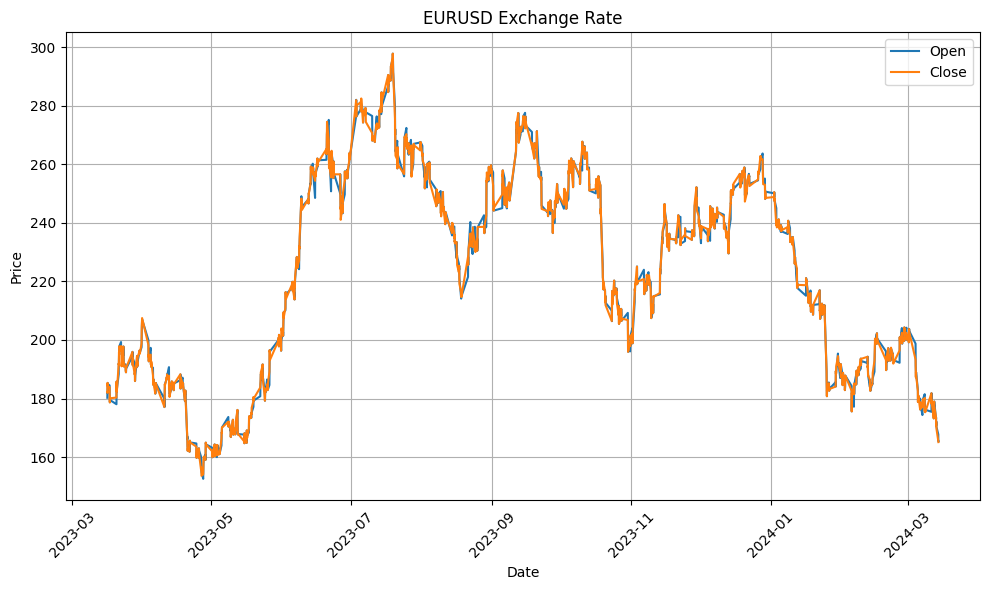

In [68]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['open'], label='Open')
plt.plot(df['date'], df['close'], label='Close')
plt.title('EURUSD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's subscribe to market depth data for EURUSD:

In [51]:
#Forex is a shortcut for specifying currency PAIRS symbol in this case EURUSD
contract = Forex('EURUSD')
ib.qualifyContracts(contract)
ticker = ib.reqMktDepth(contract)

Create a contract and a market order:

In [52]:
contract = Forex('EURUSD')
ib.qualifyContracts(contract)

order = LimitOrder('SELL', 20000, 1.11)

placeOrder will place the order order and return a ``Trade`` object right away (non-blocking):

In [72]:
trade = ib.placeOrder(contract, order)

Error 201, reqId 30: Order rejected - reason:We are unable to accept your order. Your<a href="https://prod.ibkr-web.com/ibconfluence/pages/viewpage.action?pageId=23298935"> Available Funds</a> are in sufficient to cover the change in the<br>account's margin requirements if this order executes. In order to obtain the desired position your<a href="https://prod.ibkr-web.com/ibconfluence/pages/viewpage.action?pageId=23299062"> Equity with<br>Loan Value</a> [999864.97 USD] must exceed the new total<a href="https://prod.ibkr-web.com/ibconfluence/pages/viewpage.action?pageId=23599316"> Initial Margin</a> of [1174104.05 USD].
Canceled order: Trade(contract=Stock(symbol='TSLA', exchange='SMART', currency='USD'), order=LimitOrder(orderId=30, clientId=1, permId=587008038, action='SELL', totalQuantity=20000.0, lmtPrice=1.11, auxPrice=0.0), orderStatus=OrderStatus(orderId=30, status='Cancelled', filled=0.0, remaining=20000.0, avgFillPrice=0.0, permId=587008038, parentId=0, lastFillPrice=0.0, client

Now let's create a limit order with an unrealistic limit:

In [74]:
limitOrder = LimitOrder('BUY', 20000, 0.05)
limitTrade = ib.placeOrder(contract, limitOrder)

limitTrade

Trade(contract=Stock(symbol='TSLA', exchange='SMART', currency='USD'), order=LimitOrder(orderId=31, clientId=1, action='BUY', totalQuantity=20000, lmtPrice=0.05), orderStatus=OrderStatus(orderId=31, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 3, 14, 16, 12, 2, 663304, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

placeOrder is not blocking and will not wait on what happens with the order.
To make the order placement blocking, that is to wait until the order is either
filled or canceled, consider the following:

In [75]:
%%time
order = MarketOrder('BUY', 100)

trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

CPU times: total: 0 ns
Wall time: 1.08 s


What are our positions?

In [76]:
ib.positions()

[Position(account='DU8948497', contract=Stock(conId=76792991, symbol='TSLA', exchange='NASDAQ', currency='USD', localSymbol='TSLA', tradingClass='NMS'), position=100.0, avgCost=161.94)]

What's the total of commissions paid today?

In [77]:
sum(fill.commissionReport.commission for fill in ib.fills())

1.0

whatIfOrder can be used to see the commission and the margin impact of an order without actually sending the order:

In [78]:
order = MarketOrder('SELL', 20000)
ib.whatIfOrder(contract, order)

OrderState(status='PreSubmitted', initMarginBefore='8961.7', maintMarginBefore='8147.0', equityWithLoanBefore='1000094.45', initMarginChange='1158340.48', maintMarginChange='964604.81', equityWithLoanChange='-17164.169999999925', initMarginAfter='1167302.18', maintMarginAfter='972751.81', equityWithLoanAfter='982930.28', commission=1.7976931348623157e+308, minCommission=1.7976931348623157e+308, maxCommission=1.7976931348623157e+308, commissionCurrency='', warningText='', completedTime='', completedStatus='')

In [ ]:
ib.disconnect()